In [17]:
#%pip install pandas pillow numpy matplotlib seaborn

In [27]:
import os
import pandas as pd

# Define the dataset path
dataset_path = r"C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train"

# Get list of pest folders
pest_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count images per folder
image_counts = {}
for pest in pest_folders:
    pest_path = os.path.join(dataset_path, pest)
    images = [img for img in os.listdir(pest_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    image_counts[pest] = len(images)

# Convert to DataFrame for easier analysis
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Pest', 'Image_Count'])
print("Dataset Structure:")
print(df_counts)
print("\nTotal Images:", df_counts['Image_Count'].sum())
print("Total Pest Categories:", len(pest_folders))

Dataset Structure:
                             Pest  Image_Count
0                Aphis craccivora         2542
1                  Empoasca fabae         3444
2            Helicoverpa armigera          109
3                          Locust          329
4                           mites           53
5           Schistocerca gregaria          836
6               Spodoptera exigua         1018
7           Spodoptera frugiperda           94
8               Spodoptera litura          816
9                         Termite          331
10  Termite odontotermes (Rambur)          361
11            Tetranychus urticae          435
12                  Thrips tabaci          636

Total Images: 11004
Total Pest Categories: 13


In [25]:
import os
import hashlib

# Define the dataset path
dataset_path = r"C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train"

# Function to compute file hash
def get_file_hash(file_path):
    try:
        with open(file_path, 'rb') as f:
            return hashlib.md5(f.read()).hexdigest()
    except PermissionError:
        print(f"Permission denied: {file_path}")
        return None
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Dictionary to store hashes
hashes = {}

# Iterate over pest folders
pest_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

for pest in pest_folders:
    pest_path = os.path.join(dataset_path, pest)
    # Only process files with image extensions, skip directories
    images = [img for img in os.listdir(pest_path) 
              if os.path.isfile(os.path.join(pest_path, img)) 
              and img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    
    for img in images:
        img_path = os.path.join(pest_path, img)
        img_hash = get_file_hash(img_path)
        if img_hash:
            if img_hash in hashes:
                print(f"Duplicate found: {img_path} matches {hashes[img_hash]}")
            hashes[img_hash] = img_path

print("Duplicate detection completed.")

Duplicate found: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Aphis craccivora\Image_86.jpg matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Aphis craccivora\Image_84.jpg
Duplicate found: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Helicoverpa armigera\Image_51.jpg matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Helicoverpa armigera\Image_39.jpg
Duplicate found: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage212.jpeg matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage201.jpeg
Duplicate found: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage262.jpeg matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage261.jpeg
Duplicate found: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_30.jpg matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_3.

In [26]:
import os
import hashlib

# Define the dataset path
dataset_path = r"C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train"

# Function to compute file hash
def get_file_hash(file_path):
    try:
        with open(file_path, 'rb') as f:
            return hashlib.md5(f.read()).hexdigest()
    except PermissionError:
        print(f"Permission denied: {file_path}")
        return None
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Dictionary to store hashes and their first file path
hashes = {}
deleted_count = 0

# Iterate over pest folders
pest_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

for pest in pest_folders:
    pest_path = os.path.join(dataset_path, pest)
    # Only process files with image extensions, skip directories
    images = [img for img in os.listdir(pest_path) 
              if os.path.isfile(os.path.join(pest_path, img)) 
              and img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    
    for img in images:
        img_path = os.path.join(pest_path, img)
        img_hash = get_file_hash(img_path)
        if img_hash:
            if img_hash in hashes:
                # Duplicate found: delete the current file
                try:
                    os.remove(img_path)
                    print(f"Deleted duplicate: {img_path} (matches {hashes[img_hash]})")
                    deleted_count += 1
                except PermissionError:
                    print(f"Permission denied: Could not delete {img_path}")
                except Exception as e:
                    print(f"Error deleting {img_path}: {e}")
            else:
                # First occurrence: store it
                hashes[img_hash] = img_path

# Summary
if deleted_count > 0:
    print(f"\nDuplicate deletion completed. Total duplicates deleted: {deleted_count}")
else:
    print("\nNo duplicates found in the dataset.")

Deleted duplicate: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Aphis craccivora\Image_86.jpg (matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Aphis craccivora\Image_84.jpg)
Deleted duplicate: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Helicoverpa armigera\Image_51.jpg (matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Helicoverpa armigera\Image_39.jpg)
Deleted duplicate: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage212.jpeg (matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage201.jpeg)
Deleted duplicate: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage262.jpeg (matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\Locust\LocustImage261.jpeg)
Deleted duplicate: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_30.jpg (matches C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset

In [22]:
import os

# Define the dataset path
dataset_path = r"C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train"

# Supported image extensions
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')

# Get list of pest folders
pest_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Counter for deleted files
deleted_count = 0

# Iterate through each pest folder
for pest in pest_folders:
    pest_path = os.path.join(dataset_path, pest)
    # List all files in the pest folder
    files = [f for f in os.listdir(pest_path) if os.path.isfile(os.path.join(pest_path, f))]
    
    for file in files:
        # Check if the file is an image and contains "copy" in its name (case-insensitive)
        if file.lower().endswith(image_extensions) and "copy" in file.lower():
            file_path = os.path.join(pest_path, file)
            try:
                os.remove(file_path)  # Delete the file
                print(f"Deleted: {file_path}")
                deleted_count += 1
            except PermissionError:
                print(f"Permission denied: Could not delete {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# Summary
if deleted_count > 0:
    print(f"\nTotal files deleted: {deleted_count}")
else:
    print("\nNo files with 'copy' in their name were found.")

Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_20 - Copy.jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_26 - Copy.jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_28 - Copy.jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_31 - Copy (2).jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_31 - Copy (3).jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_31 - Copy (4).jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_31 - Copy.jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_33 - Copy (2).jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_33 - Copy (3) - Copy.jpg
Deleted: C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train\mites\jpg_33 - Copy (3).jpg
Deleted: C:\Users\oklabo\Docu

In [14]:
%pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.14.1-cp312-cp312-win_amd64.whl.metadata (50 kB)
  Using cached ten

ERROR: Could not install packages due to an OSError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'c:\\Users\\oklabo\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Processing 331 Locust images and 836 Schistocerca gregaria images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━

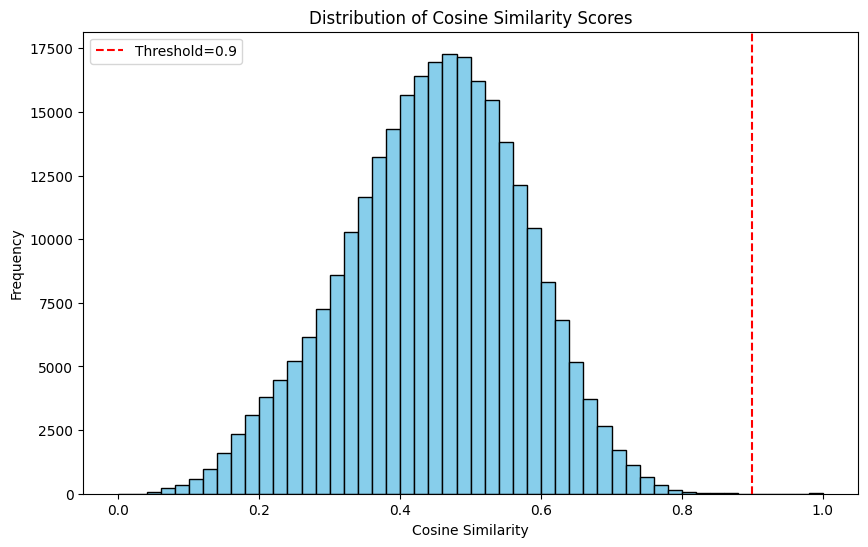

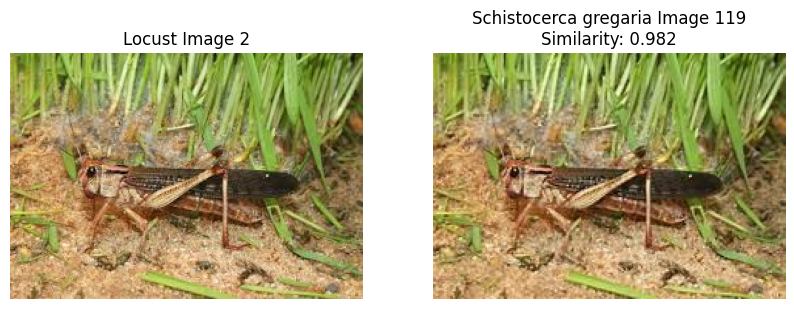

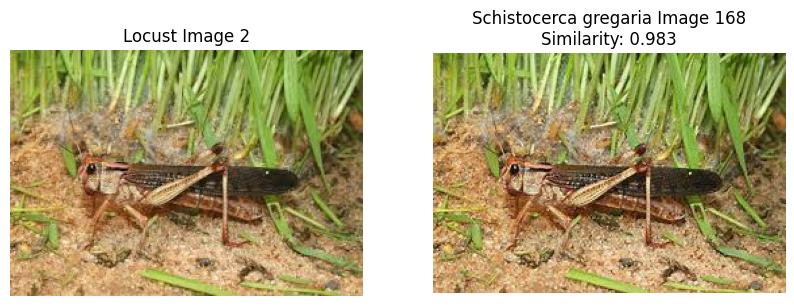

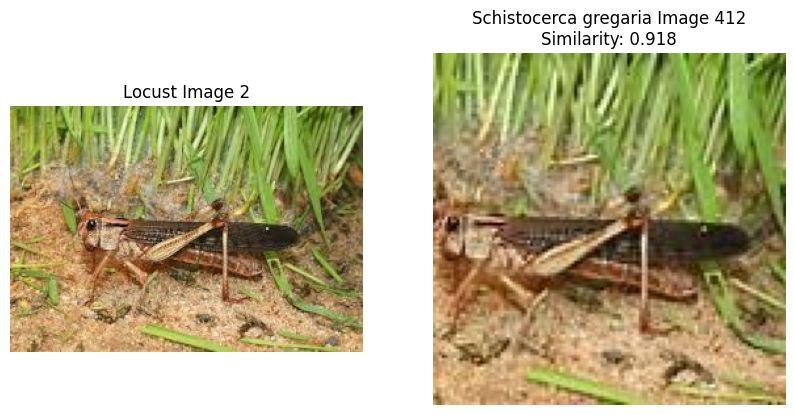

In [15]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Define dataset path and folders
dataset_path = r"C:\Users\oklabo\Documents\PeanutPestControl\ok_dataset\Train"
locust_folder = os.path.join(dataset_path, "Locust")
schisto_folder = os.path.join(dataset_path, "Schistocerca gregaria")

# Load pre-trained VGG16 model (without top classification layer)
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Function to load and preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return img_array
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

# Function to extract features from an image
def extract_features(image_path):
    img_array = preprocess_image(image_path)
    if img_array is not None:
        features = model.predict(img_array)
        return features.flatten()
    return None

# Load images and extract features
locust_images = [os.path.join(locust_folder, img) for img in os.listdir(locust_folder) 
                 if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
schisto_images = [os.path.join(schisto_folder, img) for img in os.listdir(schisto_folder) 
                  if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

print(f"Processing {len(locust_images)} Locust images and {len(schisto_images)} Schistocerca gregaria images...")

locust_features = []
schisto_features = []

for img_path in locust_images:
    features = extract_features(img_path)
    if features is not None:
        locust_features.append(features)

for img_path in schisto_images:
    features = extract_features(img_path)
    if features is not None:
        schisto_features.append(features)

locust_features = np.array(locust_features)
schisto_features = np.array(schisto_features)

print(f"Extracted features for {len(locust_features)} Locust images and {len(schisto_features)} Schistocerca gregaria images.")

# Compute cosine similarity between all pairs
similarity_matrix = cosine_similarity(locust_features, schisto_features)

# Define similarity threshold (e.g., 0.9 for "very similar")
threshold = 0.9
similar_pairs = np.where(similarity_matrix >= threshold)

# Count unique Locust images with at least one similar Schistocerca gregaria image
unique_locust_matches = len(np.unique(similar_pairs[0]))
print(f"Number of Locust images with at least one similar Schistocerca gregaria image (threshold={threshold}): {unique_locust_matches}")
print(f"Percentage of Locust images with matches: {unique_locust_matches / len(locust_features) * 100:.2f}%")

# Visualize similarity distribution
plt.figure(figsize=(10, 6))
plt.hist(similarity_matrix.flatten(), bins=50, range=(0, 1), color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold={threshold}')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Optional: Display a few similar pairs
def show_similar_pair(locust_idx, schisto_idx, similarity):
    locust_img = Image.open(locust_images[locust_idx])
    schisto_img = Image.open(schisto_images[schisto_idx])
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(locust_img)
    plt.title(f"Locust Image {locust_idx}")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(schisto_img)
    plt.title(f"Schistocerca gregaria Image {schisto_idx}\nSimilarity: {similarity:.3f}")
    plt.axis('off')
    plt.show()

# Show up to 3 similar pairs
for i, (locust_idx, schisto_idx) in enumerate(zip(similar_pairs[0][:3], similar_pairs[1][:3])):
    similarity = similarity_matrix[locust_idx, schisto_idx]
    show_similar_pair(locust_idx, schisto_idx, similarity)

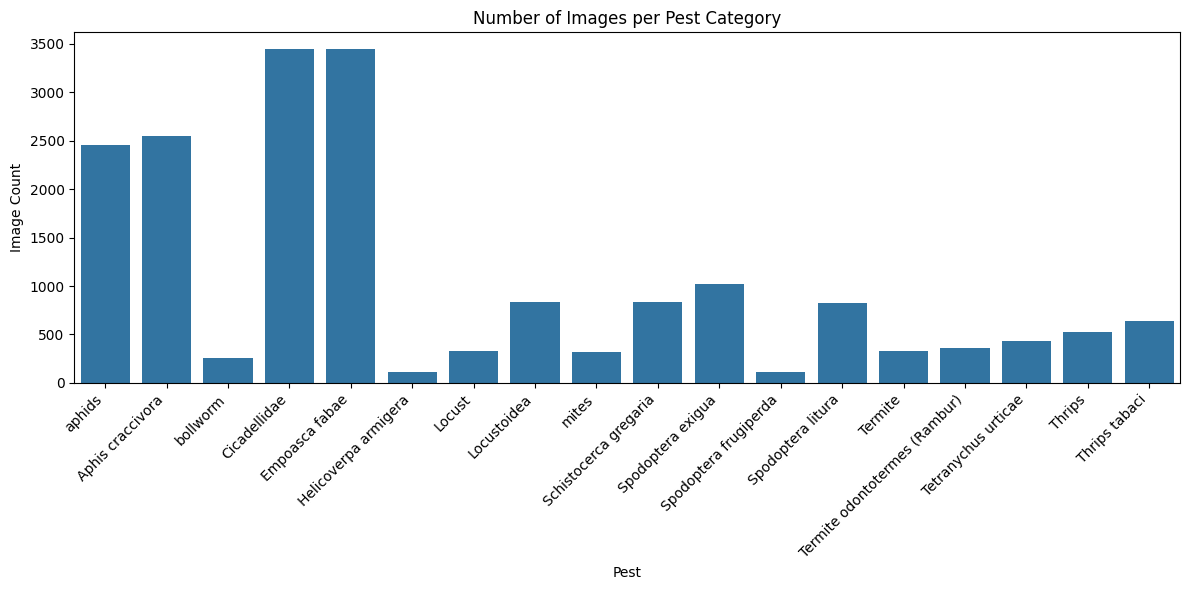

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Pest', y='Image_Count', data=df_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Images per Pest Category')
plt.xlabel('Pest')
plt.ylabel('Image Count')
plt.tight_layout()
plt.show()

In [5]:
from PIL import Image
import numpy as np

# Dictionary to store image properties
image_properties = {'Pest': [], 'File': [], 'Width': [], 'Height': [], 'Format': [], 'Mean_Pixel': []}

for pest in pest_folders:
    pest_path = os.path.join(dataset_path, pest)
    images = [img for img in os.listdir(pest_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    
    for img_file in images:
        try:
            img_path = os.path.join(pest_path, img_file)
            with Image.open(img_path) as img:
                width, height = img.size
                img_array = np.array(img)
                mean_pixel = img_array.mean() if img_array.size > 0 else 0
                
                image_properties['Pest'].append(pest)
                image_properties['File'].append(img_file)
                image_properties['Width'].append(width)
                image_properties['Height'].append(height)
                image_properties['Format'].append(img.format)
                image_properties['Mean_Pixel'].append(mean_pixel)
        except Exception as e:
            print(f"Error processing {img_file} in {pest}: {e}")

# Convert to DataFrame
df_images = pd.DataFrame(image_properties)
print("\nImage Properties Summary:")
print(df_images.describe())
print("\nUnique Formats:", df_images['Format'].unique())


Image Properties Summary:
              Width        Height    Mean_Pixel
count  18820.000000  18820.000000  18820.000000
mean     523.244633    411.208874    127.323854
std      362.948222    274.073464     48.641315
min       75.000000     68.000000      6.827487
25%      305.000000    243.000000     93.228329
50%      458.000000    336.500000    117.833677
75%      640.000000    500.000000    161.773538
max     6000.000000   4160.000000    249.787376

Unique Formats: ['JPEG' 'PNG' 'WEBP' 'BMP']


In [6]:
corrupted_files = df_images[df_images['Mean_Pixel'] == 0]  # Example condition for corruption
if not corrupted_files.empty:
    print("\nPotentially Corrupted Images:")
    print(corrupted_files[['Pest', 'File']])
else:
    print("\nNo corrupted images detected.")


No corrupted images detected.


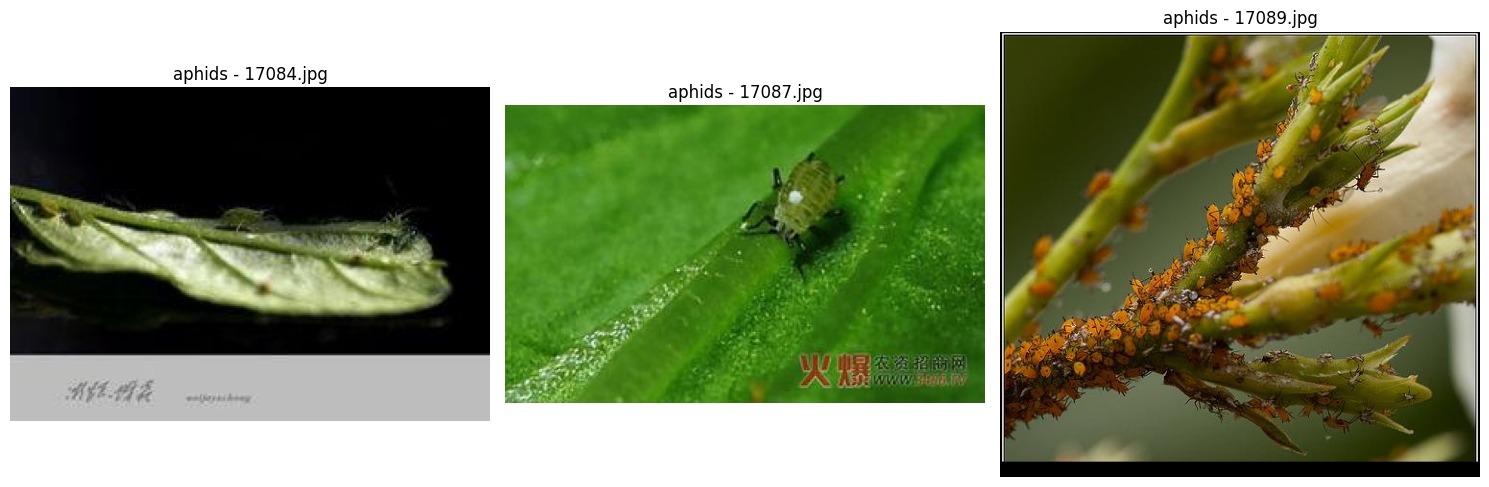

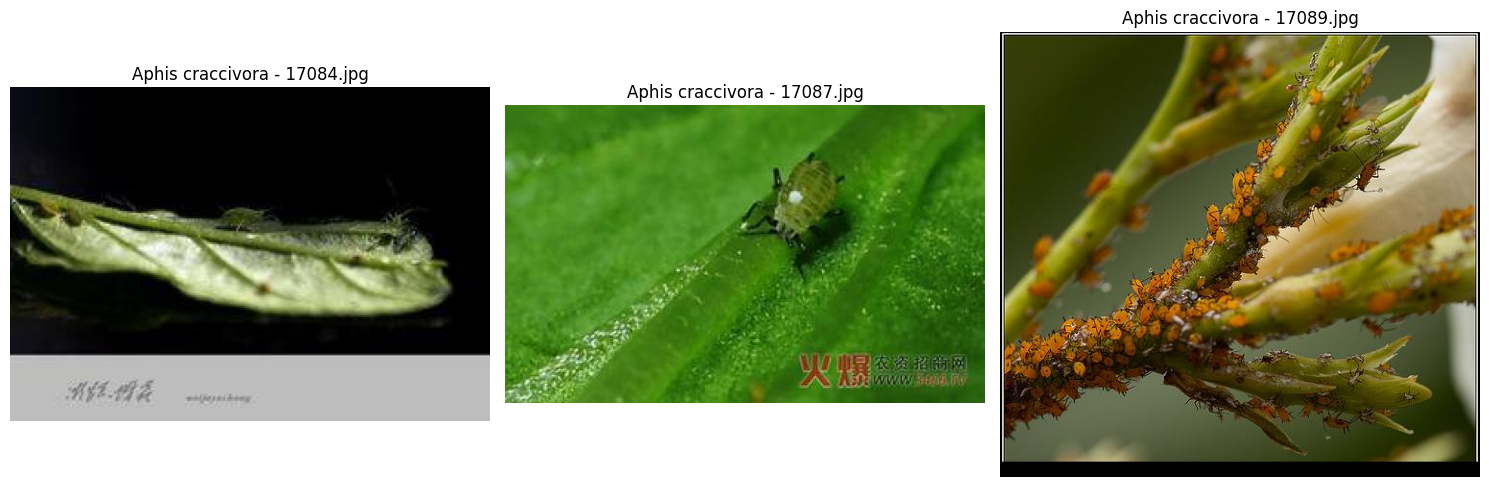

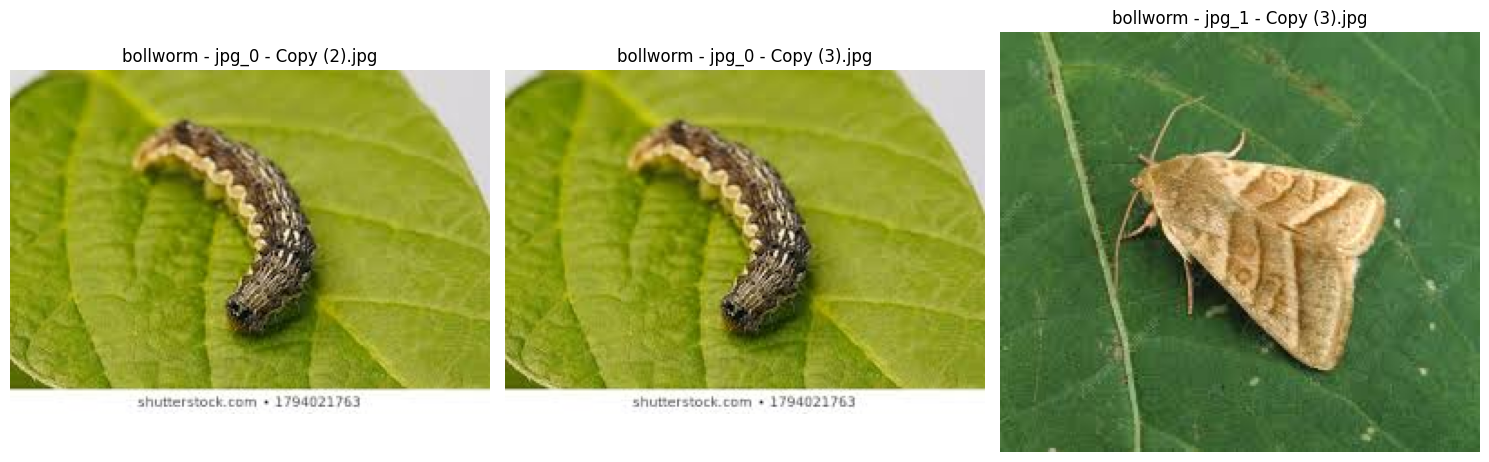

In [8]:
def plot_sample_images(pest, num_samples=3):
    pest_path = os.path.join(dataset_path, pest)
    images = [img for img in os.listdir(pest_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    sample_images = images[:num_samples]
    
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(pest_path, img_file)
        with Image.open(img_path) as img:
            plt.subplot(1, num_samples, i+1)
            plt.imshow(img)
            plt.title(f"{pest} - {img_file}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot samples for each pest
for pest in pest_folders[:3]:  # Limit to first 3 for brevity
    plot_sample_images(pest)

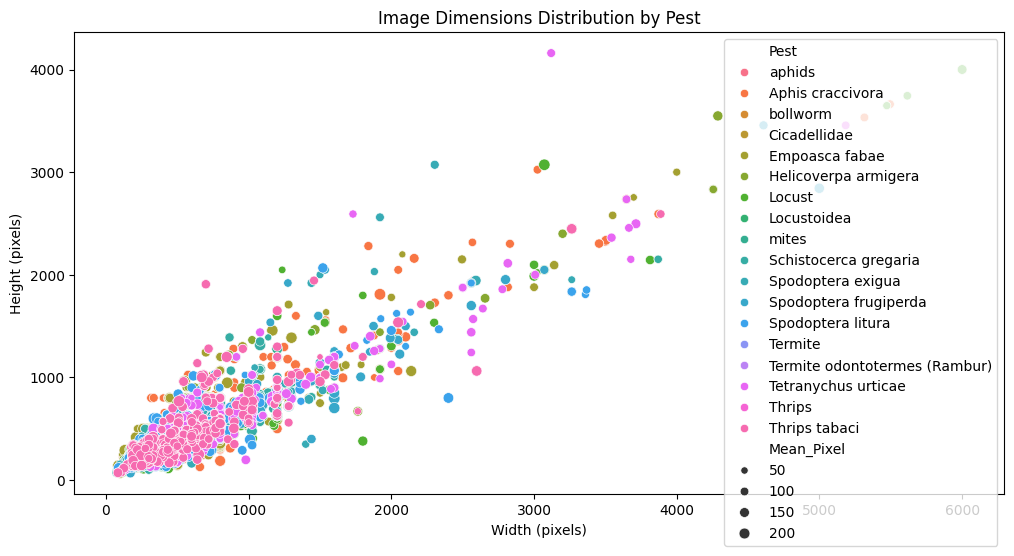

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Width', y='Height', hue='Pest', size='Mean_Pixel', data=df_images)
plt.title('Image Dimensions Distribution by Pest')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()